## Praproses Data Penelitian

### 1. Deklarasi Pustaka

In [12]:
# pustaka manipulasi data array
import numpy as np
from numpy import concatenate

# pustaka manipulasi data frame
import pandas as pd
from pandas import concat
from pandas import DataFrame

# pustaka tanggal
from datetime import datetime
from matplotlib import pyplot as plt

# pustaka normalisasi data
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling

# pustaka data latih dan data uji
from sklearn.model_selection import train_test_split

### 2. Deklarasi Function

### 3. Data Hotspot

In [13]:
# load dataset
df_hotspot = pd.read_csv("dataset/hotspot_sumsel_harian_2020.csv", parse_dates=["acq_date"])

In [14]:
# # set index 
# df_hotspot = df_hotspot.set_index("acq_date")

In [15]:
df_hotspot

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-2.8201,104.0716,307.4,1.9,1.3,2001-01-14,405,Terra,MODIS,41,6.03,288.7,7.6,D,2
1,-2.8225,104.0882,313.2,1.9,1.3,2001-01-14,405,Terra,MODIS,68,6.03,290.7,17.7,D,2
2,-2.8277,104.0809,313.9,1.9,1.3,2001-01-14,405,Terra,MODIS,68,6.03,290.8,19.4,D,2
3,-2.8246,104.0782,302.3,1.8,1.3,2001-02-10,1607,Terra,MODIS,48,6.03,279.1,11.8,N,2
4,-2.8216,104.0829,306.1,1.2,1.1,2001-02-23,1536,Terra,MODIS,67,6.03,290.8,7.3,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156969,-4.7336,104.3046,318.6,1.0,1.0,2020-09-24,642,Aqua,MODIS,65,6.03,299.3,6.9,D,0
156970,-4.4815,103.9869,308.9,2.1,1.4,2020-09-28,617,Aqua,MODIS,42,6.03,284.5,18.9,D,0
156971,-4.6100,103.9028,323.4,1.0,1.0,2020-10-26,641,Aqua,MODIS,76,6.03,286.5,17.7,D,0
156972,-4.5831,103.8989,321.2,1.0,1.0,2020-10-26,641,Aqua,MODIS,65,6.03,285.4,15.0,D,0


In [16]:
# Aggregasi Data
# Agregasi data harian menjadi bulanan dengan menghitung jumlah hotspot per bulan
df_hotspot_bulanan = df_hotspot.resample('M', on='acq_date').size().reset_index(name='hotspot')

In [17]:
df_hotspot_bulanan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acq_date  240 non-null    datetime64[ns]
 1   hotspot   240 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


In [18]:
df_hotspot_bulanan

,acq_date,hotspot
0,2001-01-31,3
1,2001-02-28,5
2,2001-03-31,10
3,2001-04-30,20
4,2001-05-31,39
...,...,...
235,2020-08-31,65
236,2020-09-30,29
237,2020-10-31,40
238,2020-11-30,30


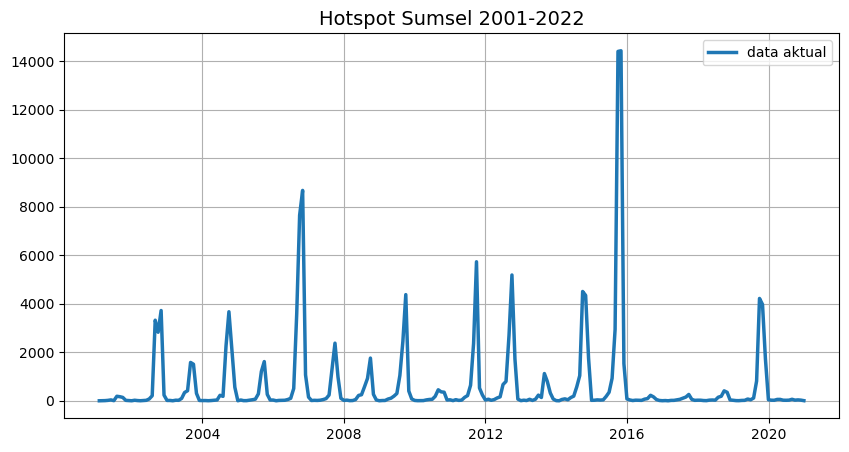

In [19]:
# membuat frame
fig, ax = plt.subplots(figsize = (10,5))

# membuat time series plot
ax.plot(df_hotspot_bulanan["acq_date"], df_hotspot_bulanan["hotspot"], color="tab:blue", label="data aktual", linewidth=2.5)

# membuat label-label
ax.set_title("Hotspot Sumsel 2001-2022", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="upper right")
ax.grid(True)

# menampilkan plot
plt.show()